Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df1=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\credit_card_dataset\Credit_card.csv")
df1.head() 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
df1.shape

(1548, 18)

In [4]:
df2=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\credit_card_dataset\Credit_card_label.csv")
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
df2.shape 

(1548, 2)

In [6]:
df=pd.merge(left=df1,right=df2,how="inner",on="Ind_ID")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
df.shape

(1548, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [9]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

#### counting age in years 

In [10]:
### changing the birthdau count column to age 
df["Age"]=abs(df["Birthday_count"]//365)

In [11]:
#filling missing values in age
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Age"]=df["Age"].astype(int)
df["Age"].unique() 

array([52, 38, 44, 61, 50, 25, 47, 36, 33, 49, 34, 60, 31, 55, 30, 56, 58,
       66, 53, 45, 64, 43, 51, 32, 27, 29, 46, 68, 26, 65, 42, 39, 40, 35,
       48, 63, 54, 62, 59, 28, 57, 67, 41, 37, 24, 23, 69, 22])

In [12]:
### fnding number of unemployed people 
len(df[df["Employed_days"]>0])

261

In [13]:
df[df["Employed_days"]>0]["Employed_days"].unique() 

array([365243], dtype=int64)

- There 261 people who are unemployed 
- All of the unemployed people have same entry for for Employment days i.e 365243.

In [14]:
df["Employed_days"]=df["Employed_days"].replace(365243,0)

In [15]:
### changing employment days to years
df["EmploymentYears"]=abs(df["Employed_days"]//365) 

In [16]:
df["EmploymentYears"].unique() 

array([ 0,  2,  3,  1,  7,  5, 12, 10, 14,  4, 21, 20,  6, 23, 11,  8, 19,
       18, 26,  9, 13, 15, 24, 16, 17, 34, 37, 28, 41, 22, 35, 27, 32, 25,
       30, 38, 33, 29, 36], dtype=int64)

In [17]:
df["Type_Occupation"].isnull().sum()/df.shape[0] 

0.3152454780361757

- More than 30% values are missing in the OccupationType Column so we can drop this column.
- Ind_ID column,Employed_days and Birthday_count can be dropped

In [18]:
df.drop(columns=["Birthday_count","Employed_days","Ind_ID","Type_Occupation"],inplace=True) 

In [19]:
df.isnull().sum() 

GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Family_Members      0
label               0
Age                 0
EmploymentYears     0
dtype: int64

<Axes: xlabel='Annual_income'>

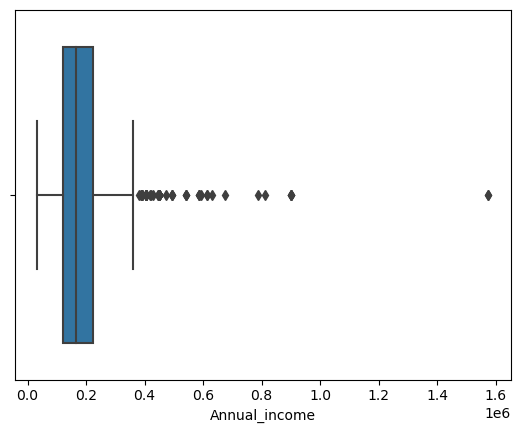

In [20]:
sns.boxplot(data=df,x="Annual_income") 

In [21]:
###by capping we can remove outlier data points in annual income
len(df[df["Annual_income"]>400000])/df.shape[0]

0.04263565891472868

- Since there are 4 percent outliers we can remove them 

In [22]:
df=df[df["Annual_income"]<400000]

In [23]:
df.shape

(1459, 17)

#### filling missing value

In [24]:
#gender column with mode
df["GENDER"]=df["GENDER"].fillna(df["GENDER"].mode()[0])

In [25]:
#Annual income with mean 
df["Annual_income"]=df["Annual_income"].fillna(df["Annual_income"].mean()) 

In [26]:
df.isnull().sum() 

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
Age                0
EmploymentYears    0
dtype: int64

In [27]:
for col in df.columns:
    print("===========")
    print(col,"    ",df[col].unique())

GENDER      ['M' 'F']
Car_Owner      ['Y' 'N']
Propert_Owner      ['Y' 'N']
CHILDREN      [ 0  2  1  4  3 14]
Annual_income      [180000.  315000.   90000.  270000.  126000.  202500.  157500.  112500.
 292500.  135000.   76500.  215100.  225000.   67500.  171000.  103500.
  99000.  391500.   65250.   72900.  360000.  256500.  247500.   85500.
 121500.  130500.  211500.   81000.   72000.  148500.  162000.  195750.
 216000.  306000.  108000.   63000.   45000.  337500.  131400.  117000.
 234000.  144000.   67050.   73350.  193500.   94500.  198000.   54000.
 166500.  167400.  153000.  243000.  283500.  252000.   36000.  139500.
 133650.  261000.  231750.   90900.   45900.  119250.   58500.  328500.
 119700.   69372.   37800.  387000.  207000.  189000.  333000.  105750.
 382500.  141750.   40500.   44550.  301500.  351000.  175500.  121900.5
 238500.   33750.  116100.  297000.   83250.  173250.  274500.  115200.
  56250.   95850.  185400.  184500.  165600.  114750.   47250.   49500.
  6975

In [28]:
### removing Mobile_phone column as it contains only one unique value   
df.drop(columns=["Mobile_phone"],inplace=True)

In [29]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1547
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1459 non-null   object 
 1   Car_Owner        1459 non-null   object 
 2   Propert_Owner    1459 non-null   object 
 3   CHILDREN         1459 non-null   int64  
 4   Annual_income    1459 non-null   float64
 5   Type_Income      1459 non-null   object 
 6   EDUCATION        1459 non-null   object 
 7   Marital_status   1459 non-null   object 
 8   Housing_type     1459 non-null   object 
 9   Work_Phone       1459 non-null   int64  
 10  Phone            1459 non-null   int64  
 11  EMAIL_ID         1459 non-null   int64  
 12  Family_Members   1459 non-null   int64  
 13  label            1459 non-null   int64  
 14  Age              1459 non-null   int32  
 15  EmploymentYears  1459 non-null   int64  
dtypes: float64(1), int32(1), int64(7), object(7)
memory usage: 188.1+

#### UNIVARIATE ANALYSIS 

In [30]:
df_ob=df.select_dtypes(include="object")

In [31]:
df_num=df.select_dtypes(include=["int64","float64","int32"])

In [32]:

df_num.columns

Index(['CHILDREN', 'Annual_income', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'Age', 'EmploymentYears'],
      dtype='object')

In [33]:
df_ob.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type'],
      dtype='object')

In [34]:
#since work phone.emailid,chidren phone and Family_Members seemsto be dicrete in nature we can add them in df_obj
obj_columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type',"CHILDREN","Work_Phone","Phone","EMAIL_ID",'Family_Members'] 

In [35]:
num_columns=["Annual_income","Age","EmploymentYears"]

In [35]:
for col in obj_columns:
    print("========================")
    print(df[col].value_counts()) 

GENDER
F    942
M    517
Name: count, dtype: int64
Car_Owner
N    892
Y    567
Name: count, dtype: int64
Propert_Owner
Y    939
N    520
Name: count, dtype: int64
Type_Income
Working                 768
Commercial associate    325
Pensioner               257
State servant           109
Name: count, dtype: int64
EDUCATION
Secondary / secondary special    993
Higher education                 378
Incomplete higher                 65
Lower secondary                   21
Academic degree                    2
Name: count, dtype: int64
Marital_status
Married                 991
Single / not married    207
Civil marriage           99
Separated                88
Widow                    74
Name: count, dtype: int64
Housing_type
House / apartment      1301
With parents             76
Municipal apartment      51
Rented apartment         19
Office apartment          7
Co-op apartment           5
Name: count, dtype: int64
CHILDREN
0     1043
1      273
2      125
3       16
4        1
14       1
Nam

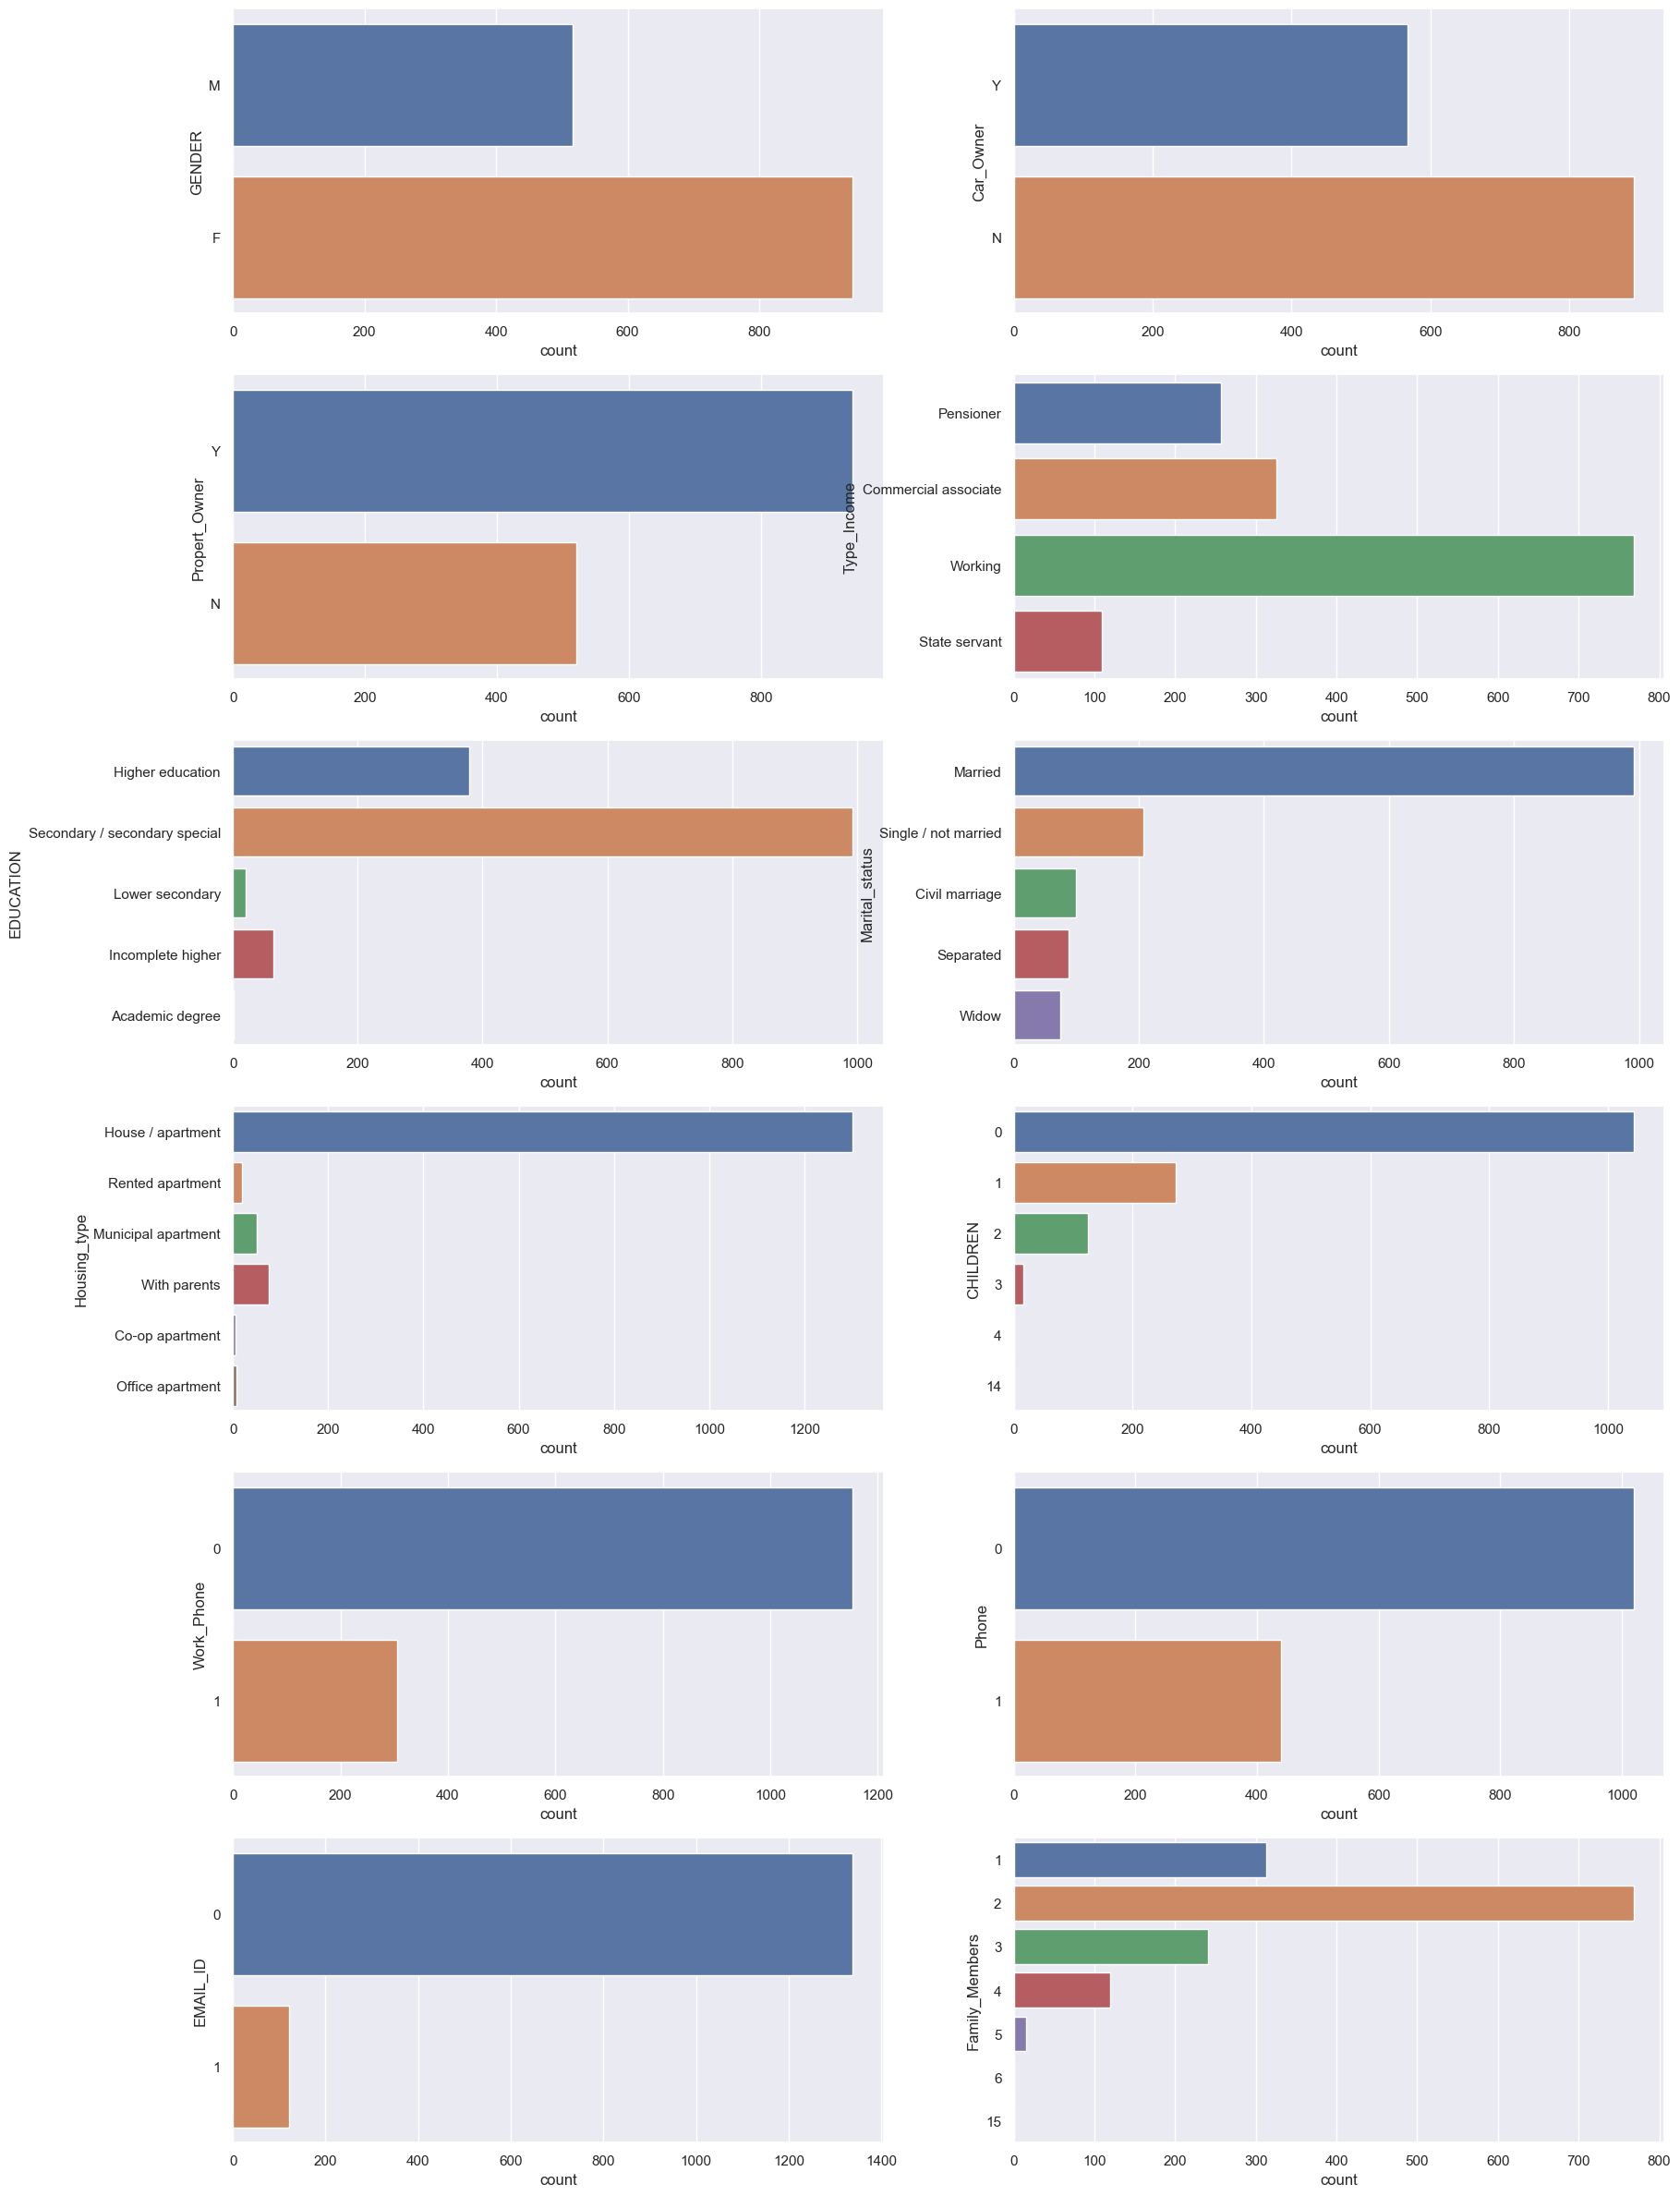

<Figure size 640x480 with 0 Axes>

In [76]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,30))
for i in range(len(obj_columns)):
    plt.subplot(6,2,i+1)
    sns.countplot(data=df,y=df[obj_columns[i]]) 
    
plt.show() 
plt.tight_layout() 

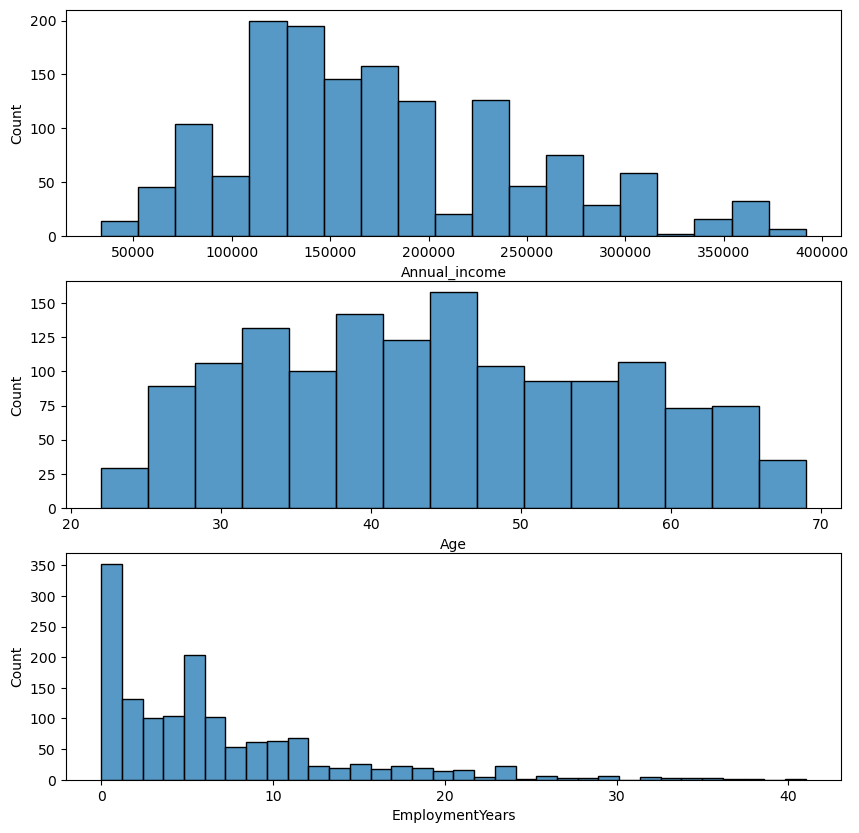

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(10,10))
for i in range(len(num_columns)):
    plt.subplot(3,1,i+1)
    sns.histplot(df[num_columns[i]])
plt.show()
plt.tight_layout() 

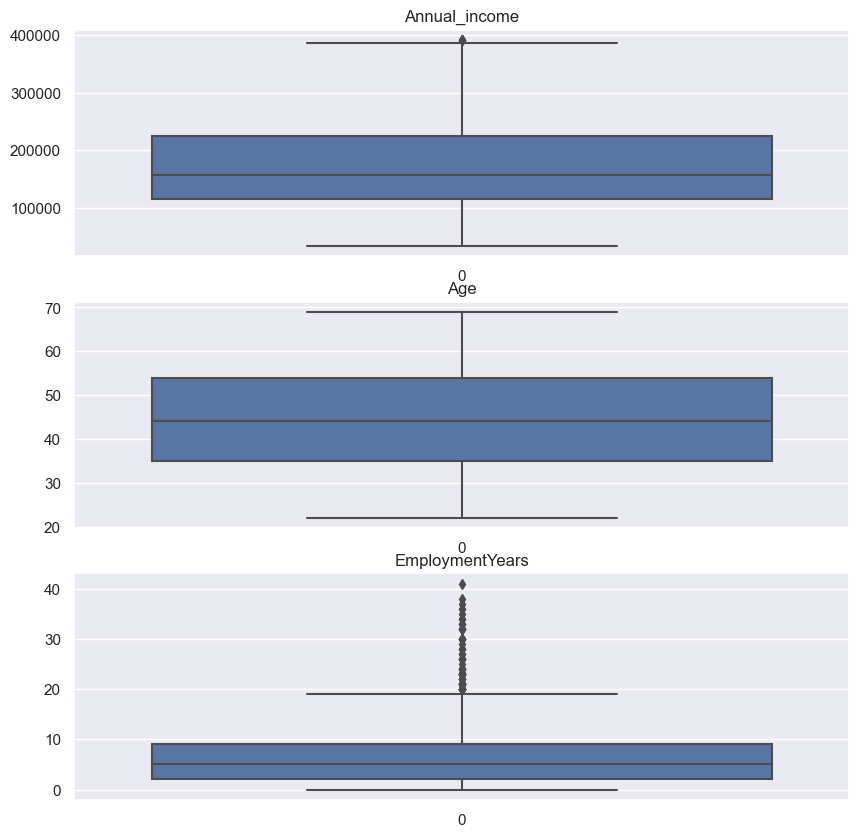

<Figure size 640x480 with 0 Axes>

In [79]:
plt.figure(figsize=(10,10))
for i in range(len(num_columns)):
    plt.subplot(3,1,i+1) 
    sns.boxplot(df[num_columns[i]])
    plt.title(num_columns[i])
plt.show()
plt.tight_layout() 

label
0    1307
1     152
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

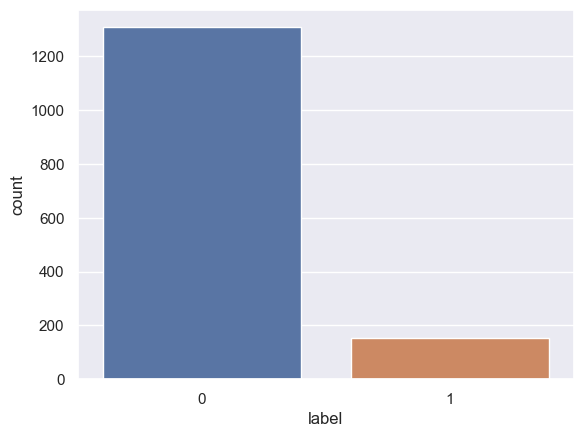

In [80]:
print(df["label"].value_counts())
sns.countplot(data=df,x=df["label"])

### numerical vs label column


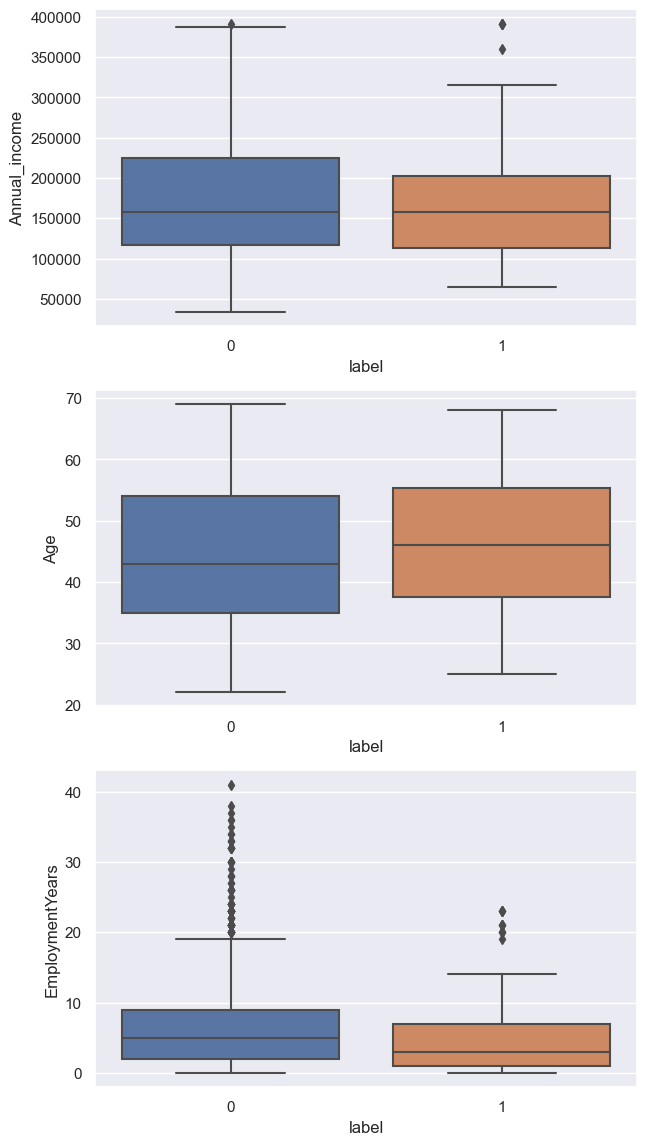

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize=(7,14))
for i in range(len(num_columns)):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=df,y=df[num_columns[i]],x="label")
    
plt.show()
plt.tight_layout() 

#### categorical vs label column 

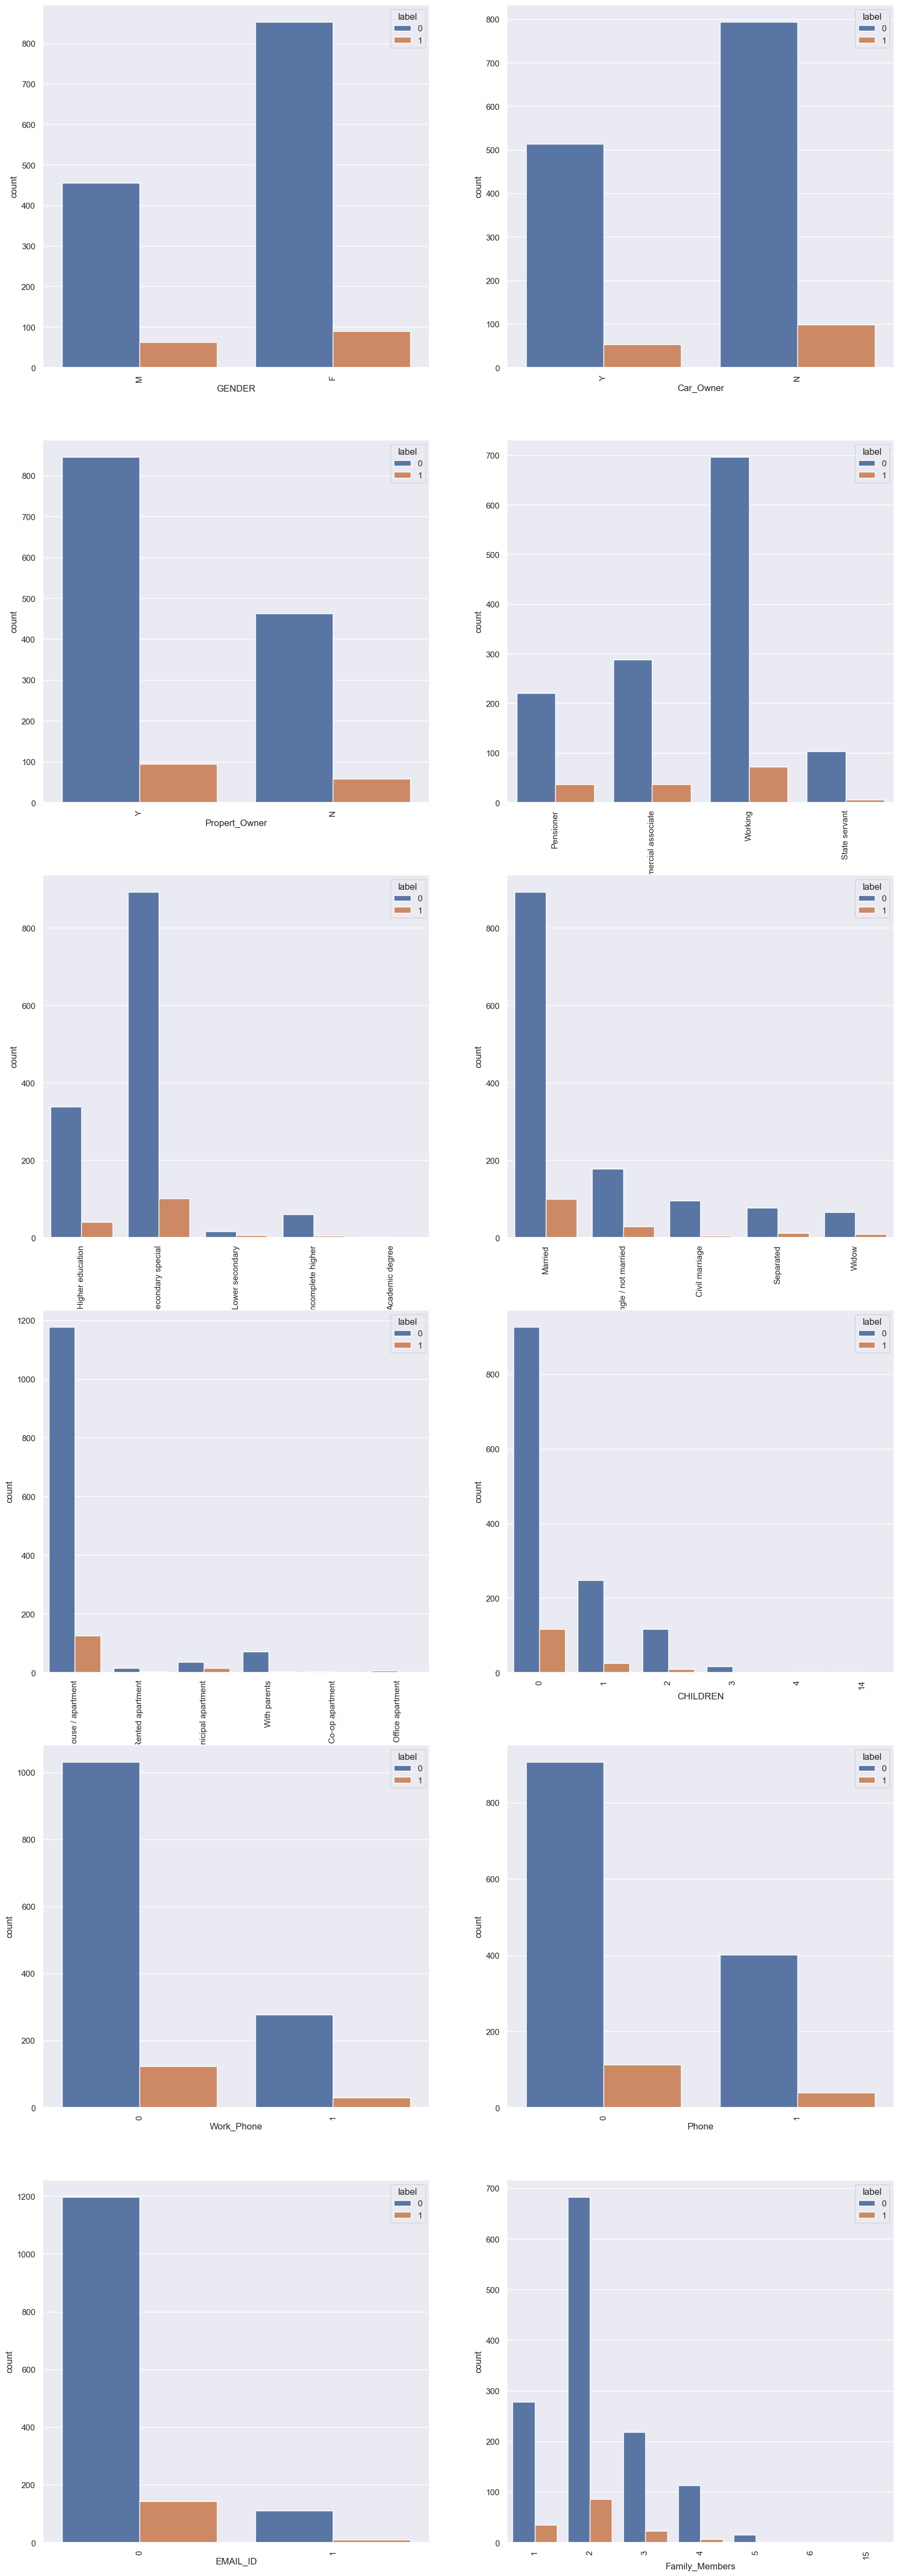

<Figure size 640x480 with 0 Axes>

In [82]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,60))
for i in range(len(obj_columns)):
   
        plt.subplot(6,2,i+1)
        sns.countplot(data=df,x=df[obj_columns[i]],hue="label") 
        plt.xticks(rotation=90)
plt.show() 
plt.tight_layout() 

In [38]:
### Since Employment years have outliers we will remove them 
len(df[df["EmploymentYears"]>20])/df.shape[0]   

0.053461274845784786

- Since Employment years have almost 5% data as outliers we can remove them

In [39]:
df=df[df["EmploymentYears"]<20]

In [40]:
df.shape

(1367, 16)

In [84]:
df.columns 

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label', 'Age',
       'EmploymentYears'],
      dtype='object')

### separating input and output 

In [41]:
x=df[['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Age',
       'EmploymentYears']]
y=df["label"] 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder


### splitting data into train and test 

In [43]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1093, 15) (1093,)
(274, 15) (274,)


#### transforming the train features

In [44]:
x_train_cat=X_train.select_dtypes(include="object")
x_train_cat.head() 

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
1259,M,Y,N,Commercial associate,Secondary / secondary special,Married,House / apartment
864,F,N,Y,Pensioner,Secondary / secondary special,Single / not married,House / apartment
927,M,Y,N,Commercial associate,Incomplete higher,Married,House / apartment
1321,M,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment
1508,F,N,N,Pensioner,Secondary / secondary special,Widow,House / apartment


In [45]:
#one hot encoding the cat features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False)

x_train_cat =encoder.fit_transform(x_train_cat)
        

x_train_cat

C:\Users\ibteda azeem\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.]])

In [46]:
#numerical features
x_train_num=X_train.select_dtypes(include=["int32","int64","float64"])
x_train_num.head() 

,CHILDREN,Annual_income,Work_Phone,Phone,EMAIL_ID,Family_Members,Age,EmploymentYears
1259,0,135000.0,1,0,0,2,30,7
864,0,180000.0,0,0,0,1,57,0
927,0,126000.0,0,1,0,2,29,8
1321,0,90000.0,1,0,0,2,46,2
1508,0,198000.0,0,1,0,1,61,0


In [47]:
#standardizing the num features 
scaler=StandardScaler()
x_train_num=scaler.fit_transform(x_train_num)
x_train_num

array([[-0.50343513, -0.55293384,  1.98637896, ..., -0.15654346,
        -1.19635817,  0.35873527],
       [-0.50343513,  0.06048202, -0.50342861, ..., -1.1872784 ,
         1.12013851, -1.11769481],
       [-0.50343513, -0.67561701, -0.50342861, ..., -0.15654346,
        -1.28215434,  0.56965385],
       ...,
       [-0.50343513, -1.16634969,  1.98637896, ..., -0.15654346,
         0.69115765, -0.48493907],
       [-0.50343513, -0.24622591, -0.50342861, ..., -0.15654346,
         0.94854617,  1.62424676],
       [-0.50343513,  0.67389787, -0.50342861, ..., -1.1872784 ,
        -1.19635817,  0.14781668]])

In [48]:
X_train=np.hstack([x_train_cat,x_train_num])
X_train

array([[ 1.        ,  1.        ,  0.        , ..., -0.15654346,
        -1.19635817,  0.35873527],
       [ 0.        ,  0.        ,  1.        , ..., -1.1872784 ,
         1.12013851, -1.11769481],
       [ 1.        ,  1.        ,  0.        , ..., -0.15654346,
        -1.28215434,  0.56965385],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.15654346,
         0.69115765, -0.48493907],
       [ 0.        ,  0.        ,  1.        , ..., -0.15654346,
         0.94854617,  1.62424676],
       [ 1.        ,  1.        ,  1.        , ..., -1.1872784 ,
        -1.19635817,  0.14781668]])

#### transforming the test features

In [49]:
x_test_cat=X_test.select_dtypes(include="object")
x_test_cat.head() 

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
1396,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment
935,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
902,M,Y,Y,Working,Secondary / secondary special,Civil marriage,House / apartment
431,F,N,N,Working,Secondary / secondary special,Married,With parents
105,M,Y,N,Working,Secondary / secondary special,Single / not married,House / apartment


In [50]:
x_test_cat = encoder.transform(x_test_cat) 
                               

x_test_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
#numerical features
x_test_num=X_test.select_dtypes(include=["int32","int64","float64"])
x_test_num.head() 

,CHILDREN,Annual_income,Work_Phone,Phone,EMAIL_ID,Family_Members,Age,EmploymentYears
1396,0,202500.0,0,0,0,2,58,5
935,2,135000.0,0,0,0,4,35,5
902,1,180000.0,0,0,0,3,39,11
431,1,90000.0,0,0,0,3,29,5
105,0,180000.0,0,0,0,1,45,2


In [52]:
#standardizing the num features 

x_test_num=scaler.transform(x_test_num)
x_test_num 

array([[-0.50343513,  0.36718995, -0.50342861, ..., -0.15654346,
         1.20593469, -0.0631019 ],
       [ 1.99772213, -0.55293384, -0.50342861, ...,  1.90492642,
        -0.7673773 , -0.0631019 ],
       [ 0.7471435 ,  0.06048202, -0.50342861, ...,  0.87419148,
        -0.42419261,  1.2024096 ],
       ...,
       [-0.50343513,  0.67389787, -0.50342861, ..., -1.1872784 ,
         1.72071173, -1.11769481],
       [-0.50343513, -0.85964177,  1.98637896, ..., -1.1872784 ,
        -1.110562  , -0.90677623],
       [-0.50343513, -0.85964177, -0.50342861, ..., -0.15654346,
         1.29173086, -1.11769481]])

In [53]:
X_test=np.hstack([x_test_cat,x_test_num])

In [54]:
X_test

array([[ 0.        ,  0.        ,  1.        , ..., -0.15654346,
         1.20593469, -0.0631019 ],
       [ 0.        ,  0.        ,  1.        , ...,  1.90492642,
        -0.7673773 , -0.0631019 ],
       [ 1.        ,  1.        ,  1.        , ...,  0.87419148,
        -0.42419261,  1.2024096 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.1872784 ,
         1.72071173, -1.11769481],
       [ 0.        ,  0.        ,  0.        , ..., -1.1872784 ,
        -1.110562  , -0.90677623],
       [ 0.        ,  0.        ,  0.        , ..., -0.15654346,
         1.29173086, -1.11769481]])

#### building logical structure 

In [55]:
X_train.shape

(1093, 27)

In [56]:
from imblearn.over_sampling import SMOTE 
s=SMOTE()
X_train,y_train=s.fit_resample(X_train,y_train) 

In [57]:
print(y_train.value_counts())

label
0    979
1    979
Name: count, dtype: int64


In [58]:
from keras import Sequential 
from keras.layers import Dense 

In [59]:
model=Sequential()
model.add(Dense(28,activation="relu",use_bias=True,input_dim=27))#input_dim only for first hidden layer
model.add(Dense(18,activation="relu",use_bias=True))
model.add(Dense(8,activation="relu",use_bias=True))
model.add(Dense(1,activation="sigmoid",use_bias=True))  

In [60]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"]) 
history=model.fit(X_train,y_train,batch_size=100,epochs=400,validation_split=0.2)  
history 

Epoch 1/400
16/16 [==============================] - 2s 25ms/step - loss: 0.6625 - accuracy: 0.6022 - val_loss: 0.8199 - val_accuracy: 0.0332
Epoch 2/400
16/16 [==============================] - 0s 6ms/step - loss: 0.6575 - accuracy: 0.6194 - val_loss: 0.8414 - val_accuracy: 0.0179
Epoch 3/400
16/16 [==============================] - 0s 6ms/step - loss: 0.6537 - accuracy: 0.6232 - val_loss: 0.8595 - val_accuracy: 0.0026
Epoch 4/400
16/16 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6226 - val_loss: 0.8755 - val_accuracy: 0.0000e+00
Epoch 5/400
16/16 [==============================] - 0s 7ms/step - loss: 0.6481 - accuracy: 0.6239 - val_loss: 0.8877 - val_accuracy: 0.0000e+00
Epoch 6/400
16/16 [==============================] - 0s 7ms/step - loss: 0.6459 - accuracy: 0.6239 - val_loss: 0.8991 - val_accuracy: 0.0000e+00
Epoch 7/400
16/16 [==============================] - 0s 6ms/step - loss: 0.6440 - accuracy: 0.6245 - val_loss: 0.9083 - val_accuracy: 0.0000e

16/16 [==============================] - 0s 8ms/step - loss: 0.5014 - accuracy: 0.7816 - val_loss: 0.7556 - val_accuracy: 0.5918
Epoch 116/400
16/16 [==============================] - 0s 8ms/step - loss: 0.4999 - accuracy: 0.7861 - val_loss: 0.7509 - val_accuracy: 0.6046
Epoch 117/400
16/16 [==============================] - 0s 8ms/step - loss: 0.4984 - accuracy: 0.7912 - val_loss: 0.7505 - val_accuracy: 0.5969
Epoch 118/400
16/16 [==============================] - 0s 8ms/step - loss: 0.4969 - accuracy: 0.7937 - val_loss: 0.7536 - val_accuracy: 0.5918
Epoch 119/400
16/16 [==============================] - 0s 8ms/step - loss: 0.4954 - accuracy: 0.7899 - val_loss: 0.7445 - val_accuracy: 0.6122
Epoch 120/400
16/16 [==============================] - 0s 8ms/step - loss: 0.4940 - accuracy: 0.7963 - val_loss: 0.7492 - val_accuracy: 0.5969
Epoch 121/400
16/16 [==============================] - 0s 8ms/step - loss: 0.4923 - accuracy: 0.7944 - val_loss: 0.7470 - val_accuracy: 0.6020
Epoch 122/400

16/16 [==============================] - 0s 8ms/step - loss: 0.3273 - accuracy: 0.8729 - val_loss: 0.4682 - val_accuracy: 0.8342
Epoch 230/400
16/16 [==============================] - 0s 8ms/step - loss: 0.3257 - accuracy: 0.8768 - val_loss: 0.4728 - val_accuracy: 0.8316
Epoch 231/400
16/16 [==============================] - 0s 10ms/step - loss: 0.3248 - accuracy: 0.8742 - val_loss: 0.4347 - val_accuracy: 0.8571
Epoch 232/400
16/16 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8793 - val_loss: 0.4782 - val_accuracy: 0.8214
Epoch 233/400
16/16 [==============================] - 0s 7ms/step - loss: 0.3214 - accuracy: 0.8806 - val_loss: 0.4760 - val_accuracy: 0.8240
Epoch 234/400
16/16 [==============================] - 0s 7ms/step - loss: 0.3200 - accuracy: 0.8787 - val_loss: 0.4355 - val_accuracy: 0.8571
Epoch 235/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.8768 - val_loss: 0.4397 - val_accuracy: 0.8571
Epoch 236/40

16/16 [==============================] - 0s 7ms/step - loss: 0.1927 - accuracy: 0.9381 - val_loss: 0.2316 - val_accuracy: 0.9566
Epoch 344/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.9381 - val_loss: 0.2582 - val_accuracy: 0.9490
Epoch 345/400
16/16 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.9419 - val_loss: 0.2230 - val_accuracy: 0.9566
Epoch 346/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1899 - accuracy: 0.9413 - val_loss: 0.2445 - val_accuracy: 0.9541
Epoch 347/400
16/16 [==============================] - 0s 7ms/step - loss: 0.1909 - accuracy: 0.9381 - val_loss: 0.2255 - val_accuracy: 0.9566
Epoch 348/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1892 - accuracy: 0.9368 - val_loss: 0.2318 - val_accuracy: 0.9541
Epoch 349/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1878 - accuracy: 0.9438 - val_loss: 0.2344 - val_accuracy: 0.9541
Epoch 350/400

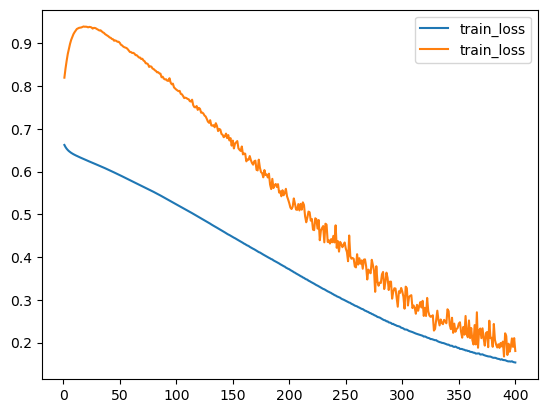

In [61]:
plt.plot(range(1,401),history.history["loss"],label="train_loss")
plt.plot(range(1,401),history.history["val_loss"],label="train_loss") 
plt.legend() 

In [62]:
predicted=model.predict(X_test)
predicted 

9/9 [==============================] - 0s 2ms/step


array([[3.69973779e-01],
       [1.72648989e-02],
       [3.71278167e-01],
       [1.37899416e-02],
       [1.44598991e-01],
       [6.81045800e-02],
       [9.85298812e-01],
       [8.49673092e-01],
       [3.61936856e-07],
       [8.02278638e-01],
       [6.39387127e-03],
       [6.82425022e-01],
       [1.01613376e-04],
       [1.93309912e-04],
       [7.81392157e-02],
       [2.24161567e-03],
       [2.40563080e-02],
       [2.44850814e-01],
       [1.66344821e-01],
       [8.29647543e-05],
       [5.96306100e-03],
       [2.13235449e-02],
       [1.31943671e-04],
       [8.14287484e-01],
       [8.32440681e-04],
       [1.64129570e-01],
       [1.71622646e-03],
       [8.31389189e-05],
       [1.83081552e-01],
       [1.51107032e-02],
       [6.40211394e-04],
       [5.73042572e-01],
       [4.39472916e-03],
       [9.91762727e-02],
       [2.39911169e-04],
       [9.90062137e-04],
       [1.78691056e-02],
       [7.73690522e-01],
       [8.93509164e-02],
       [1.11606298e-02],


In [63]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

0.8686131386861314


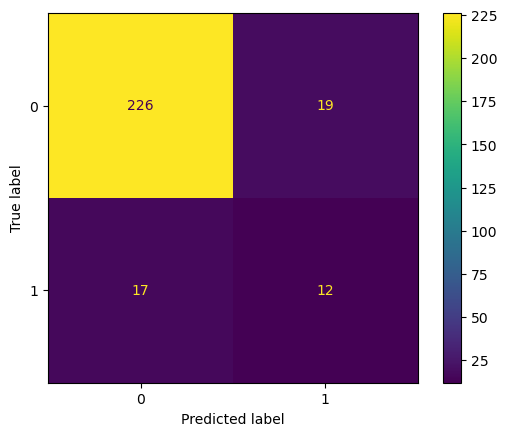

In [65]:

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

print(accuracy_score(y_test,predicted)) 

cm=confusion_matrix(y_test,predicted)

va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 



In [66]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       245
           1       0.39      0.41      0.40        29

    accuracy                           0.87       274
   macro avg       0.66      0.67      0.66       274
weighted avg       0.87      0.87      0.87       274

